In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [3]:
def score_metrics(y_pred, y_true):
    print("ACCURACY: {}".format(accuracy_score(y_true, y_pred)))
    print("PRECISION: {}".format(precision_score(y_true, y_pred, labels=np.unique(y_true))))
    print("RECALL: {}".format(recall_score(y_true, y_pred, labels=np.unique(y_true))))
    print("CONFUSION MATRIX \n{}".format(confusion_matrix(y_true, y_pred)))

In [4]:
path = "path"
data = pd.read_csv(path + "/train.csv")
test_data = pd.read_csv(path + "/test.csv")
test_pass_id = test_data.PassengerId.values

In [5]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<BarContainer object of 2 artists>

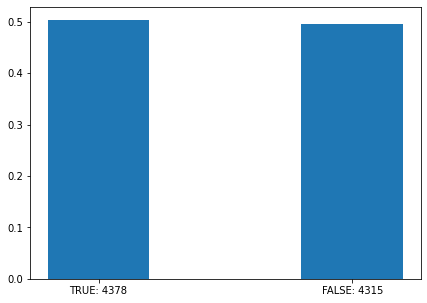

In [8]:
# The targets are balanced
tar = data.Transported.value_counts()
plt.figure(figsize=(7, 5))
plt.bar(x=["TRUE: {}".format(tar[1]), "FALSE: {}".format(tar[0])], height=tar/data.shape[0], width=0.4)

In [9]:
# The PassengerId feature contains unique ID of every instance, it doesn't help in learning process. Just remove it
data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

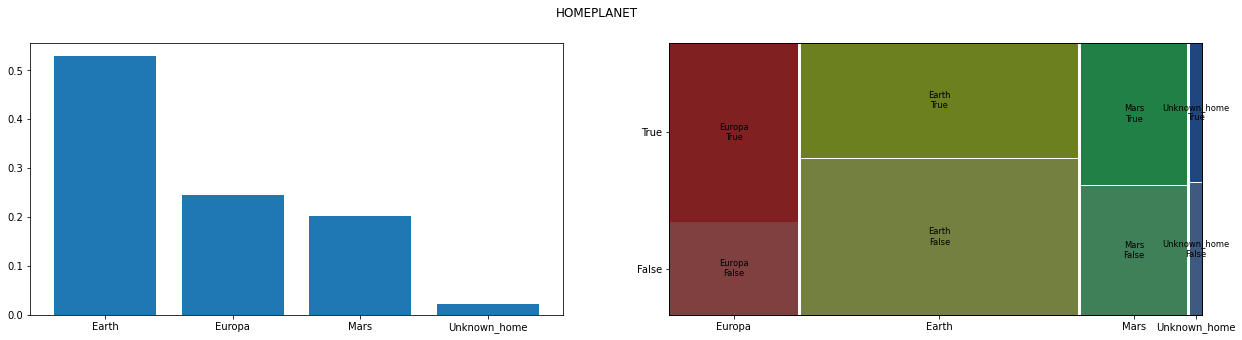

In [10]:
#HOMEPLANET
# Here, I think we can replace the values of "NaN" with a new category of "Unknown" or "Mars".
data.HomePlanet.fillna("Unknown_home", inplace=True)
test_data.HomePlanet.fillna("Unknown_home", inplace=True)
h_planets = data.HomePlanet.value_counts(dropna=False)
fig, axs = plt.subplots(1, 2, figsize=(21, 5), squeeze=False)
fig.suptitle("HOMEPLANET")
axs[0, 0].bar(x=h_planets.index, height=h_planets.values / data.shape[0])
m_plot = mosaic(data[["HomePlanet", "Transported"]], index =["HomePlanet", "Transported"], ax=axs[0, 1])

home_planet_dummies = pd.get_dummies(data.HomePlanet)
data[home_planet_dummies.columns] = 0
data[home_planet_dummies.columns] = home_planet_dummies

test_dummies = pd.get_dummies(test_data.HomePlanet)
test_data[test_dummies.columns] = 0
test_data[test_dummies.columns] = test_dummies

data.drop("HomePlanet", inplace=True, axis=1)
test_data.drop("HomePlanet", inplace=True, axis=1)

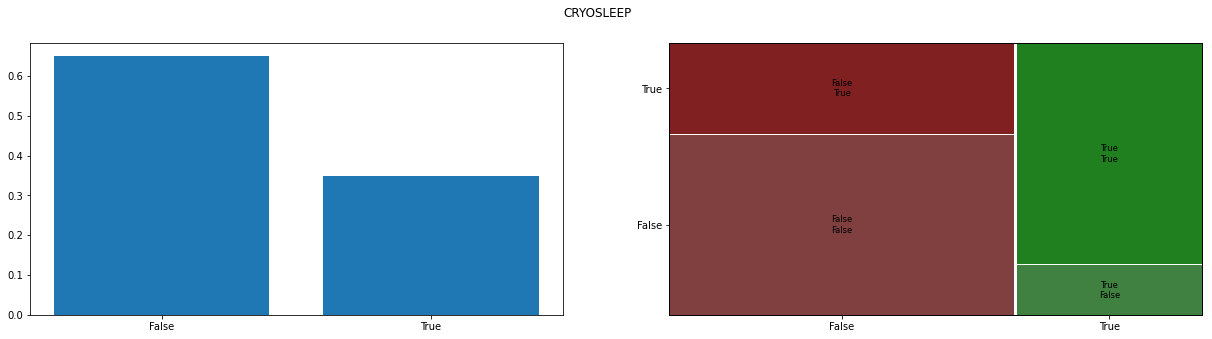

In [11]:
# CRYOSLEEP
# There are several people about whom there is no information whether they were connected to the cryo camera.
# So we can replace the values of "NaN" with "False" as the most common value
data.CryoSleep.fillna(False, inplace=True)
test_data.CryoSleep.fillna(False, inplace=True)

c_sleep = data.CryoSleep.value_counts(dropna=False)
fig, axs = plt.subplots(1, 2, figsize=(21, 5), squeeze=False)
fig.suptitle("CRYOSLEEP")
axs[0, 0].bar(x=c_sleep.index.astype(str), height=c_sleep.values / data.shape[0])
m_plot = mosaic(data[["CryoSleep", "Transported"]], index =["CryoSleep", "Transported"], ax=axs[0, 1])

c_sleep_dummies = pd.get_dummies(data.CryoSleep)
data = pd.merge(data, c_sleep_dummies, left_index=True, right_index=True)
data.rename(columns={False: "Unsleeping", True: "Sleeping"}, inplace=True)

test_dummies = pd.get_dummies(test_data.CryoSleep)
test_data = pd.merge(test_data, test_dummies, left_index=True, right_index=True)
test_data.rename(columns={False: "Unsleeping", True: "Sleeping"}, inplace=True)

data.drop("CryoSleep", axis=1, inplace=True)
test_data.drop("CryoSleep", axis=1, inplace=True)

In [12]:
# CABIN Deck/Num/Side (Split)

def deck_num_side_split(data):
    """Split function"""
    deck, num, side = [], [], []
    for tmp in data:
        if tmp is not np.NaN:
            d, n, s = tmp.split('/')
            deck.append(d)
            num.append(n)
            side.append(s)
        else:
            deck.append(tmp)
            num.append(tmp)
            side.append(tmp)
    tmp = pd.DataFrame(np.c_[deck, side], columns=["Deck", "Side"])
    return tmp

data = pd.merge(data, deck_num_side_split(data.Cabin), left_index=True, right_index=True)
data.Deck.replace({"nan": "No_deck"}, inplace=True, )
data.Side.replace({"nan": "No_side"}, inplace=True)
deck_dummies = pd.get_dummies(data.Deck)
side_dummies = pd.get_dummies(data.Side)
data = pd.merge(data, deck_dummies, left_index=True, right_index=True)
data = pd.merge(data, side_dummies, left_index=True, right_index=True)
data.drop("Cabin", inplace=True, axis=1)
data.drop("Deck", inplace=True, axis=1)
data.drop("Side", inplace=True, axis=1)

test_data = pd.merge(test_data, deck_num_side_split(test_data.Cabin), left_index=True, right_index=True)
test_data.Deck.replace({"nan": "No_deck"}, inplace=True)
test_data.Side.replace({"nan": "No_side"}, inplace=True)
test_deck_dummies = pd.get_dummies(test_data.Deck)
test_side_dummies = pd.get_dummies(test_data.Side)
test_data = pd.merge(test_data, test_deck_dummies, left_index=True, right_index=True)
test_data = pd.merge(test_data, test_side_dummies, left_index=True, right_index=True)
test_data.drop("Cabin", inplace=True, axis=1)
test_data.drop("Deck", inplace=True, axis=1)
test_data.drop("Side", inplace=True, axis=1)

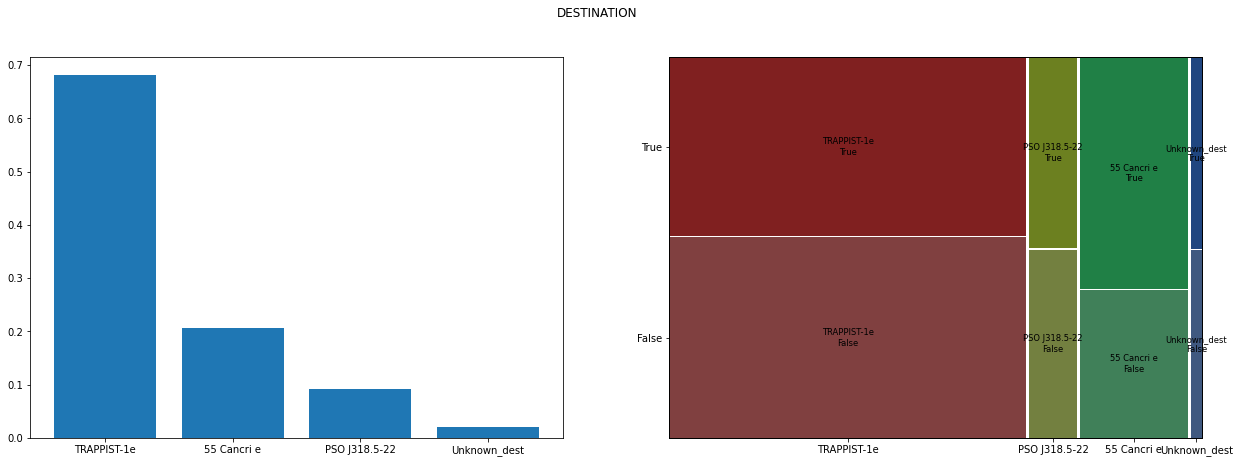

In [13]:
# DESTINATION
data.Destination.fillna("Unknown_dest", inplace=True)
test_data.Destination.fillna("Unknown_dest", inplace=True)

dest = data.Destination.value_counts(dropna=False)
fig, axs = plt.subplots(1, 2, squeeze=False, figsize=(21, 7))
fig.suptitle("DESTINATION")
axs[0, 0].bar(x=dest.index.astype(str), height=dest.values / data.shape[0])
m = mosaic(data[["Destination", "Transported"]], ["Destination", "Transported"], ax=axs[0, 1])

data = pd.merge(data, pd.get_dummies(data.Destination), left_index=True, right_index=True)
test_data = pd.merge(test_data, pd.get_dummies(test_data.Destination), left_index=True, right_index=True)
data.drop("Destination", inplace=True, axis=1)
test_data.drop("Destination", inplace=True, axis=1)

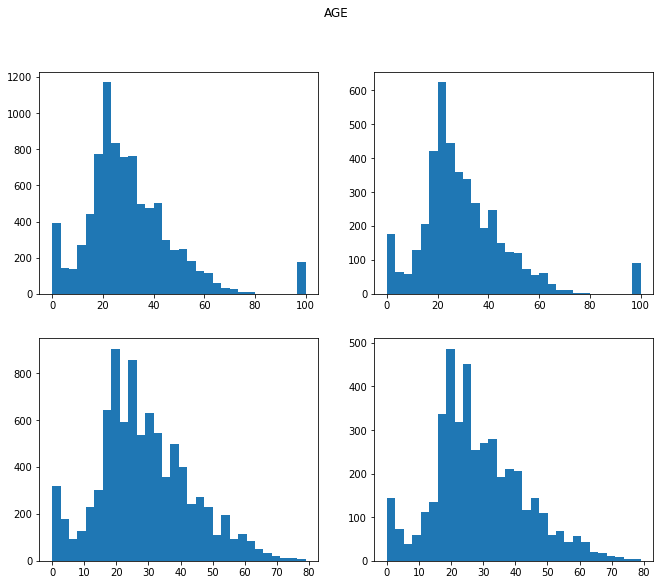

In [14]:
# AGE
# Perhaps I should divide the data from this function into categories.
def age_normalization(data, f_min=0, f_max=1, flag="train", factor=np.NaN):
    if flag == "train":
        d_min, d_max = data.min(), data.max()
        factor = (f_min - f_max) / (d_max - d_min)
        normalized = f_min + (data - d_min) * factor
        return normalized, [factor, d_min]
    else:
        return f_min + (data - factor[1]) * factor[0]

fig, axs = plt.subplots(2, 2, squeeze=False, figsize=(11, 9))
fig.suptitle("AGE")
axs[0, 0].hist(data.Age.fillna(100), bins=30)
axs[0, 1].hist(test_data.Age.fillna(100), bins=30)
age_mean = np.round(data.Age.mean())
age_std = np.round(data.Age.std())
for idx in data[data.Age.isna()].Age.index:
    data.loc[idx, "Age"] = age_mean + np.random.randint(-age_std, age_std)
for idx in test_data[test_data.Age.isna()].Age.index:
    test_data.loc[idx, "Age"] = age_mean + np.random.randint(-age_std, age_std)
axs[1, 0].hist(data.Age.fillna(100), bins=30)
axs[1, 1].hist(test_data.Age.fillna(100), bins=30)
plt.show()
data.Age, coef = age_normalization(data.Age)
test_data.Age = age_normalization(test_data.Age, flag="test", factor=coef)

In [15]:
# VIP
data.VIP.fillna(False, inplace=True)
test_data.VIP.fillna(False, inplace=True)

vip_dummies = pd.get_dummies(data.VIP)
data = pd.merge(data, vip_dummies, left_index=True, right_index=True)
data.rename(columns={False: "No_VIP", True: "_VIP"}, inplace=True)
data.drop("VIP", inplace=True, axis=1)

test_dummies = pd.get_dummies(test_data.VIP)
test_data = pd.merge(test_data, test_dummies, left_index=True, right_index=True)
test_data.rename(columns={False: "No_VIP", True: "_VIP"}, inplace=True)
test_data.drop("VIP", inplace=True, axis=1)

In [16]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
data["LuxuryAmenities"] = np.sum(data.loc[:, "RoomService": "VRDeck"].values, axis=1)
data.loc[data.LuxuryAmenities != 0, "LuxuryAmenities"] = "Yes_luxury"
data.loc[data.LuxuryAmenities == 0, "LuxuryAmenities"] = "No_luxury"
luxury_dummies = pd.get_dummies(data.LuxuryAmenities)
data = pd.merge(data, luxury_dummies, left_index=True, right_index=True)


test_data["LuxuryAmenities"] = np.sum(test_data.loc[:, "RoomService": "VRDeck"].values, axis=1)
test_data.loc[test_data.LuxuryAmenities != 0, "LuxuryAmenities"] = "Yes_luxury"
test_data.loc[test_data.LuxuryAmenities == 0, "LuxuryAmenities"] = "No_luxury"
test_dummies = pd.get_dummies(test_data.LuxuryAmenities)
test_data = pd.merge(test_data, test_dummies, left_index=True, right_index=True)

In [17]:
targets = data.Transported.values.astype(np.int16)
data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "Transported", "LuxuryAmenities"], axis=1, inplace=True)
test_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "LuxuryAmenities"], axis=1, inplace=True)

In [32]:
data = data.values
data = np.c_[np.ones((data.shape[0], 1)), data]
targets[targets == 0] = -1
test_data = test_data.values
test_data = np.c_[np.ones((test_data.shape[0], 1)), test_data]
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [19]:
def train_val_errors_plot(train_errors, val_errors, train_accuracy, val_accuracy):
    plt.figure(figsize=(11, 9))
    plt.plot(train_errors, label="Train errors")
    plt.plot(val_errors, label="Validation errors")
    plt.plot(train_accuracy, label="Train accuracy")
    plt.plot(val_accuracy, label="Validation accuracy")
    plt.axis([0, len(train_errors), 0, 1])
    plt.legend()
    plt.show()

In [20]:
def hinge_error(point, target, C, weights, flag="train"):
    if flag == "train":
        return max(0, 1 - point.dot(weights)*target) + weights.flatten().dot(weights) / 2 / C
    else:
        return max(0, 1 - point.dot(weights)*target)

In [33]:
def svm_custom(X_train, y_train, X_val=None, y_val=None, epochs=300, C=[0.1, 1, 10, 100, 1000]):
    """
    This is a custom svm algorithm without kernelization trick.
    It returns 'Weights'
    """
    best_weights, best_error = np.NaN, float("inf")
    best_c = np.NaN
    n, m = X_train.shape
    t = 10
    for c in C:
        weights = np.random.rand(m, 1)
        train_errors, val_errors = [], []
        train_accuracy, val_accuracy = [], []
        for epoch in range(1, epochs):
            grad = np.zeros((m, 1))
            eta = t / epoch
            error = 0
            val_error = 0
            for point, target in zip(X_train, y_train):
                error += hinge_error(point, target, c, weights) / n
                # error += hinge_error(point, target, C, weights, 'no_reg') / n

                grad += (weights / c - point.reshape(-1, 1) * target) if point.dot(weights) * target < 1 else weights / c
                # grad += (-point.reshape(-1, 1) * target) if point.dot(weights) * target < 1 else 0

            for point, target in zip(X_val, y_val):
                val_error += hinge_error(point, target, c, weights, "validation") / X_val.shape[0]
            train_errors.append(error)
            val_errors.append(val_error)
            if val_error < best_error:
                best_c = c
                best_error = val_error
                best_weights = weights.copy()
            train_pred = np.sign(X_train.dot(weights))
            val_pred = np.sign(X_val.dot(weights))
            train_accuracy.append(accuracy_score(y_train, train_pred))
            val_accuracy.append(accuracy_score(y_val, val_pred))
            weights -= eta * grad / n
            print(f"Epoch: {epoch} --- Error: {error}")
        train_val_errors_plot(train_errors, val_errors, train_accuracy, val_accuracy)

    return (best_weights, best_c)

In [34]:
svm_model_weights, best_c = svm_custom(X_train, y_train, X_val, y_val)
print(f"BEST C: {best_c}")

Epoch: 1 --- Error: [2.44560911]
Epoch: 2 --- Error: [10.64448182]
Epoch: 3 --- Error: [4.00887112]
Epoch: 4 --- Error: [1.28318708]
Epoch: 5 --- Error: [0.98628802]
Epoch: 6 --- Error: [0.92223138]
Epoch: 7 --- Error: [0.87286843]
Epoch: 8 --- Error: [0.83344142]
Epoch: 9 --- Error: [0.80233075]
Epoch: 10 --- Error: [0.77762985]
Epoch: 11 --- Error: [0.75689198]
Epoch: 12 --- Error: [0.73936284]
Epoch: 13 --- Error: [0.72479803]
Epoch: 14 --- Error: [0.71228676]
Epoch: 15 --- Error: [0.70098357]
Epoch: 16 --- Error: [0.69117669]
Epoch: 17 --- Error: [0.68239765]
Epoch: 18 --- Error: [0.67448231]
Epoch: 19 --- Error: [0.66749431]
Epoch: 20 --- Error: [0.66147423]
Epoch: 21 --- Error: [0.65616577]
Epoch: 22 --- Error: [0.65149931]
Epoch: 23 --- Error: [0.64741874]
Epoch: 24 --- Error: [0.64393458]
Epoch: 25 --- Error: [0.64097948]
Epoch: 26 --- Error: [0.63836273]
Epoch: 27 --- Error: [0.63606842]
Epoch: 28 --- Error: [0.63400495]
Epoch: 29 --- Error: [0.63211867]
Epoch: 30 --- Error: [

In [35]:
train_pred = np.sign(X_train.dot(svm_model_weights))
score_metrics(train_pred, y_train)

ACCURACY: 0.7213345263965231
PRECISION: 0.8120950323974082
RECALL: 0.5763924374041901
CONFUSION MATRIX 
[[3387  522]
 [1658 2256]]


In [24]:
val_pred = np.sign(X_val.dot(svm_model_weights))
score_metrics(val_pred, y_val)

ACCURACY: 0.7100893997445722
PRECISION: 0.8411552346570397
RECALL: 0.5600961538461539
CONFUSION MATRIX 
[[323  44]
 [183 233]]


In [25]:
test_pred = np.sign(test_data.dot(svm_model_weights))
test_pred[test_pred == -1] = 0
test_pred = test_pred.astype(bool)

In [26]:
to_kaggle = pd.DataFrame(np.c_[test_pass_id, test_pred], columns=["PassengerId", "Transported"])

In [27]:
to_kaggle.to_csv("Spaceship_pred.csv", index=False)